In [267]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
data_players=pd.read_csv("final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [3]:
data_players.shape

(10754, 22)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [4]:
# to display all the columns
pd.set_option("display.max_columns", None) 
data_players.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [5]:
# player:the player on a specific platform.
# team: The name of the team the player.
# name: The full name of the player.
# position: The player's position on the field 
# height: The player's height in centimeters.
# age: The player's age in years at the time of data collection.
# appearance: The number of matches the player has participated in.
# goals: The total number of goals scored by the player.
# assists: The total number of assists made by the player.
# yellow cards: The number of yellow cards received by the player.
# red cards: The number of red cards received by the player.
# goals conceded:The number of goals conceded while the player was on the field.
# clean sheets: The number of matches where the player's team did not concede any goals.
# minutes played: The total number of minutes the player has played in matches.
# days_injured: The total number of days the player was unavailable due to injuries.
# games_injured: The number of games the player missed due to injuries.
# award: The number of awards or recognitions the player has received.
# current_value: The player's market value at the time of data collection, typically in euros.
# highest_value: The highest recorded market value of the player in their career, typically in euros.
# position_encoded: A numerical encoding representing the player's position for modeling purposes.
# winger: A binary indicator (0 or 1) denoting whether the player is a winger.

data_players.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [6]:
data_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [7]:
data_players.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [8]:
# Data from kaggle (Reliabe)

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [9]:
# the data is up to date

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [10]:
# droup player
data_players.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [11]:
#no duplicat
data_players.duplicated().sum()

np.int64(0)

In [12]:
data_players.duplicated('name').sum()

np.int64(170)

In [13]:
data_players[data_players.duplicated(['name'], keep=False)]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
27,/antony/profil/spieler/602105,Manchester United,Antony,Attack-RightWinger,172.0,23.0,80,0.335252,0.228581,0.182865,0.015239,0.000000,0.00000,0.000000,5906,196,22,5,70000000,75000000,4,1
54,/danny-ward/profil/spieler/203026,Leicester City,Danny Ward,Goalkeeper,191.0,29.0,33,0.000000,0.000000,0.000000,0.000000,0.000000,1.69697,0.242424,2970,127,29,2,8000000,10000000,1,0
121,/joao-moutinho/profil/spieler/29364,Wolverhampton Wanderers,João Moutinho,midfield-CentralMidfield,170.0,36.0,75,0.034091,0.051136,0.119318,0.000000,0.000000,0.00000,0.000000,5280,146,24,16,2000000,30000000,3,0
123,/chiquinho/profil/spieler/695454,Wolverhampton Wanderers,Chiquinho,Attack-LeftWinger,179.0,23.0,32,0.223048,0.557621,0.334572,0.000000,0.000000,0.00000,0.000000,1614,327,44,2,2500000,3000000,4,1
126,/adama-traore/profil/spieler/204103,Wolverhampton Wanderers,Adama Traoré,Attack-RightWinger,178.0,27.0,80,0.095541,0.143312,0.071656,0.000000,0.000000,0.00000,0.000000,3768,200,25,2,12000000,40000000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10263,/luke-daniels/profil/spieler/1037729,Cape Town City FC,Luke Daniels,Attack Centre-Forward,187.0,19.0,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,212,0,0,0,200000,200000,4,0
10721,/bernardo/profil/spieler/883217,Adelaide United,Bernardo,Attack-RightWinger,171.0,19.0,26,0.228814,0.228814,0.228814,0.000000,0.000000,0.00000,0.000000,1180,0,0,0,200000,200000,4,1
10729,/marcelo/profil/spieler/52920,Western Sydney Wanderers,Marcelo,Defender Centre-Back,191.0,36.0,47,0.091347,0.022837,0.251205,0.000000,0.045674,0.00000,0.000000,3941,26,2,5,800000,9000000,2,0
10731,/rhys-williams/profil/spieler/82474,Western Sydney Wanderers,Rhys Williams,Defender Centre-Back,187.0,34.0,6,0.000000,0.000000,0.681818,0.000000,0.000000,0.00000,0.000000,528,1307,146,0,150000,2000000,2,0


In [14]:
specific_name = 'João Moutinho'

duplicated_specific_name = data_players[data_players['name'] == specific_name]

duplicates = duplicated_specific_name[duplicated_specific_name.duplicated(['name'], keep=False)]

duplicates


,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
121,/joao-moutinho/profil/spieler/29364,Wolverhampton Wanderers,João Moutinho,midfield-CentralMidfield,170.0,36.0,75,0.034091,0.051136,0.119318,0.0,0.0,0.0,0.0,5280,146,24,16,2000000,30000000,3,0
1842,/joao-moutinho/profil/spieler/461906,Spezia Calcio,João Moutinho,Defender Left-Back,191.0,25.0,5,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,145,440,52,1,1500000,1500000,2,1


In [15]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [16]:
#Display number missing values per column
data_players.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [17]:
#no nulls
data_players.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [18]:
# go to clean them 


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [19]:
data_players.head(1)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0


In [20]:
# check columns types 
data_players.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [21]:
data_players= data_players.drop(columns=['player'])

In [22]:
data_players.head(1)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0


In [23]:
# Convert categorical variables using OneHotEncoding
categorical_features = ['position','team']

In [24]:
data_players['goals']

0        0.000000
1        0.000000
2        0.000000
3        0.028090
4        0.017889
           ...   
10749    0.175953
10750    0.372671
10751    0.375000
10752    0.312139
10753    0.000000
Name: goals, Length: 10754, dtype: float64

In [25]:
# Find the largest goal value
largest_goal = data_players['goals'].max()
largest_goal


np.float64(11.25)

In [26]:
data_players.head(3)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0


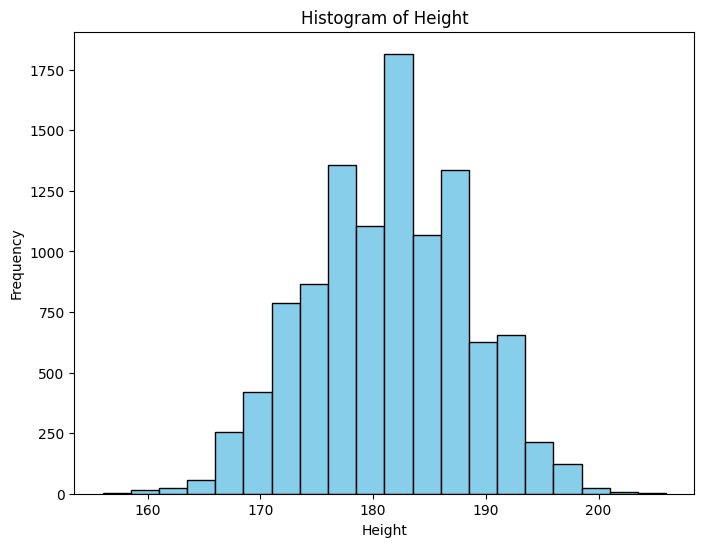

In [27]:
# check outliers + clean them + Dealing with outliers:

# 'height'
#>160 &<200
plt.figure(figsize=(8, 6))
plt.hist(data_players['height'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [28]:
Q1 = data_players['height'].quantile(0.25) 
Q3 = data_players['height'].quantile(0.75)  
IQR = Q3 - Q1  # Interquartile range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_players = data_players[(data_players['height'] >= lower_bound) & (data_players['height'] <= upper_bound)]


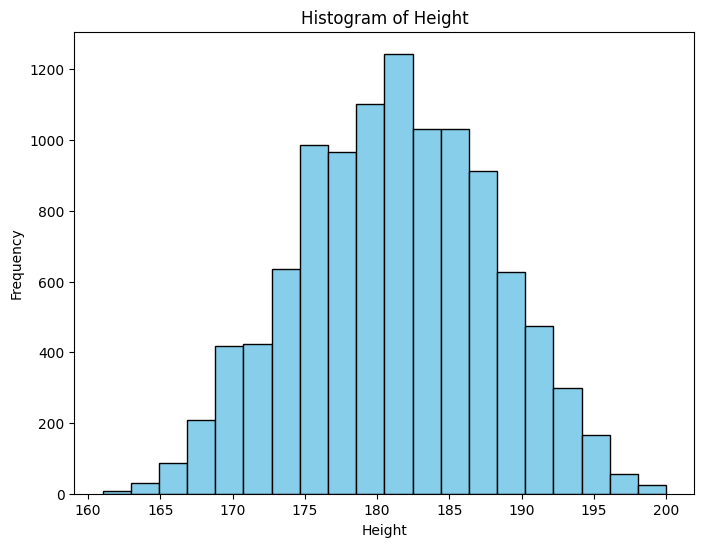

In [29]:
plt.figure(figsize=(8, 6))
plt.hist(data_players['height'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()


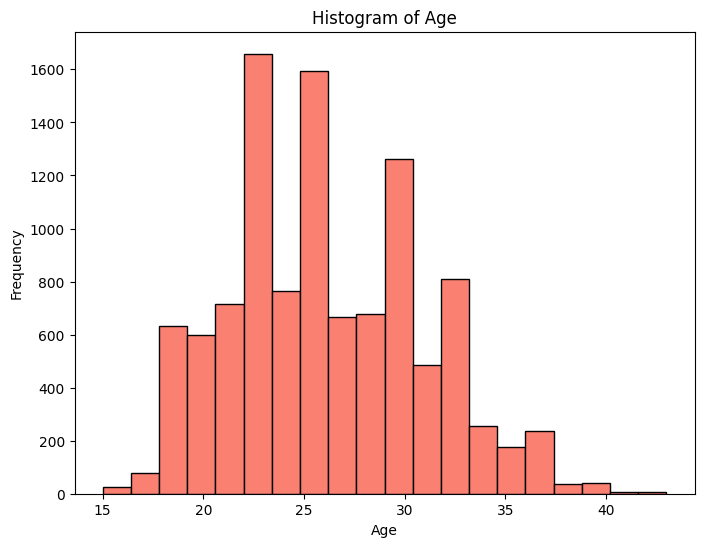

In [30]:
# 'age'
plt.figure(figsize=(8, 6))
plt.hist(data_players['age'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [31]:

Q1 = data_players['age'].quantile(0.25) 
Q3 = data_players['age'].quantile(0.75)  
IQR = Q3 - Q1  

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_players = data_players[(data_players['age'] >= lower_bound) & (data_players['age'] <= upper_bound)]

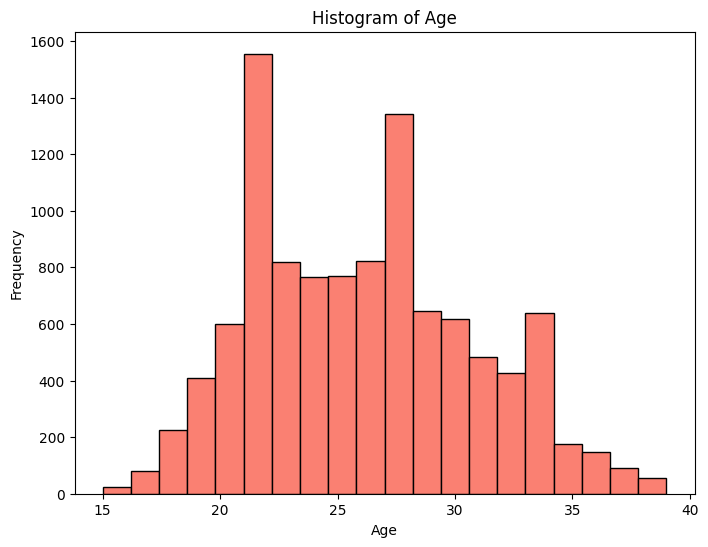

In [32]:
plt.figure(figsize=(8, 6))
plt.hist(data_players['age'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

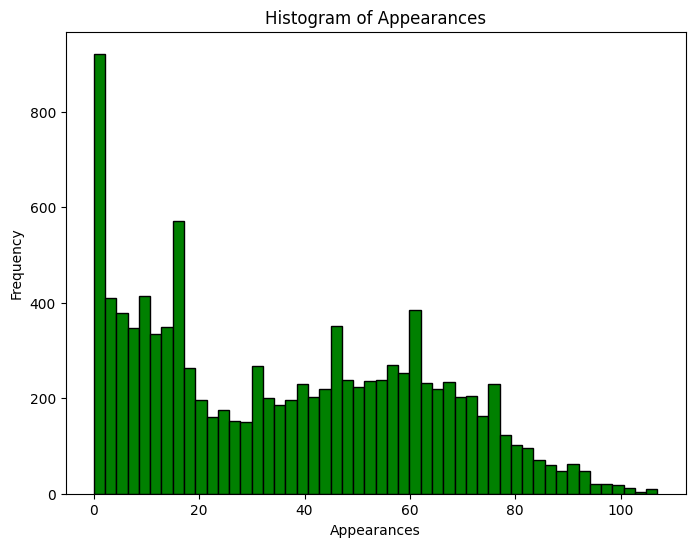

In [33]:
# 'appearance'
plt.figure(figsize=(8, 6))
plt.hist(data_players['appearance'], bins=50, color='green', edgecolor='black')
plt.title('Histogram of Appearances')
plt.xlabel('Appearances')
plt.ylabel('Frequency')
plt.show()


In [34]:

Q1 = data_players['appearance'].quantile(0.25)  
Q3 = data_players['appearance'].quantile(0.75)  
IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_players = data_players[(data_players['appearance'] >= lower_bound) & (data_players['appearance'] <= upper_bound)]

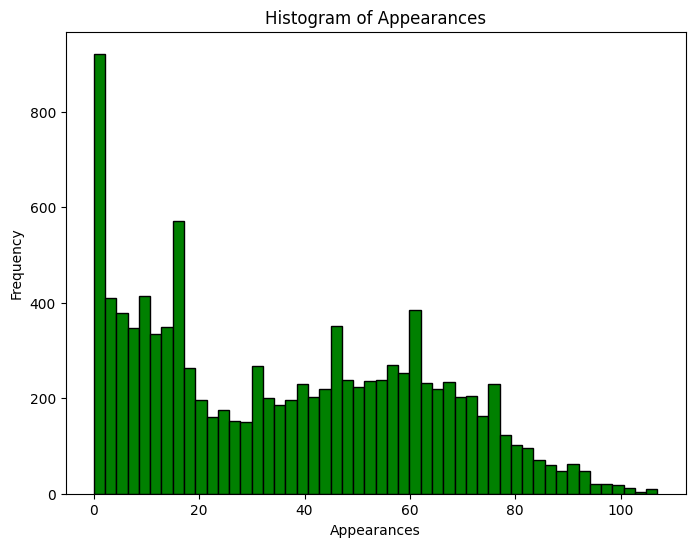

In [35]:
plt.figure(figsize=(8, 6))
plt.hist(data_players['appearance'], bins=50, color='green', edgecolor='black')
plt.title('Histogram of Appearances')
plt.xlabel('Appearances')
plt.ylabel('Frequency')
plt.show()

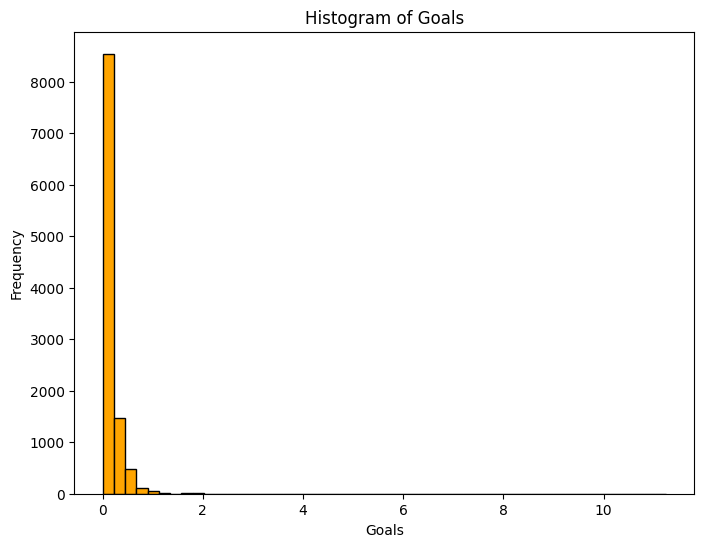

In [36]:
# 'goals'
plt.figure(figsize=(8, 6))
plt.hist(data_players['goals'], bins=50, color='orange', edgecolor='black')
plt.title('Histogram of Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()


In [37]:
data_players.shape

(10695, 21)

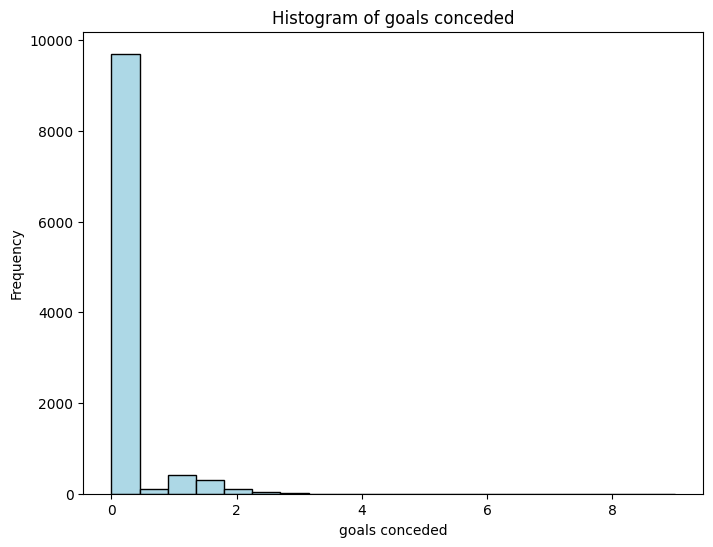

In [38]:
plt.figure(figsize=(8, 6))
plt.hist(data_players['goals conceded'], bins=20, color='lightblue', edgecolor='black')
plt.title('Histogram of goals conceded')
plt.xlabel('goals conceded')
plt.ylabel('Frequency')
plt.show()

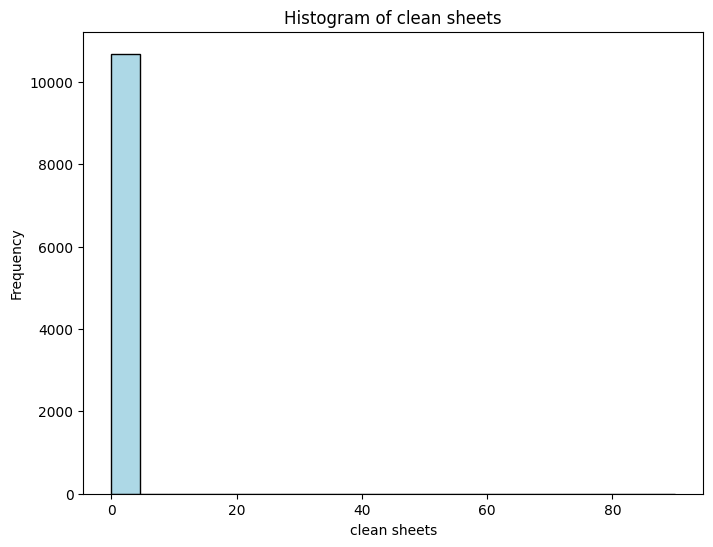

In [39]:
plt.figure(figsize=(8, 6))
plt.hist(data_players['clean sheets'], bins=20, color='lightblue', edgecolor='black')
plt.title('Histogram of clean sheets')
plt.xlabel('clean sheets')
plt.ylabel('Frequency')
plt.show()

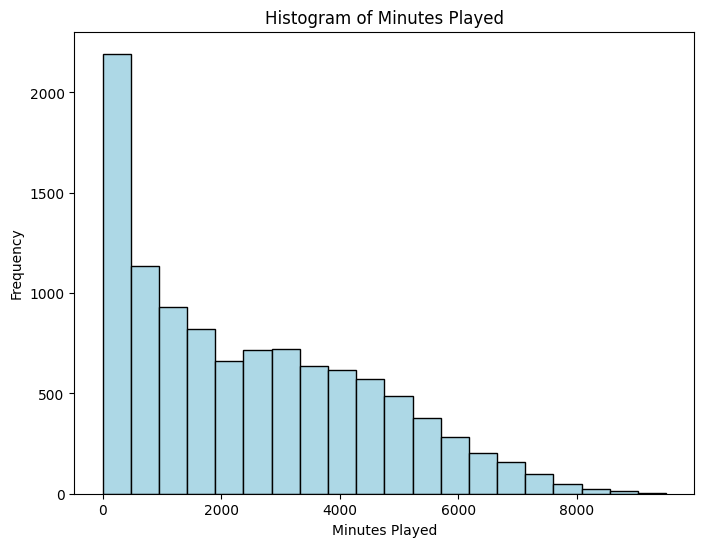

In [40]:
# 'minutes_played'
#remove from 80000
plt.figure(figsize=(8, 6))
plt.hist(data_players['minutes played'], bins=20, color='lightblue', edgecolor='black')
plt.title('Histogram of Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Frequency')
plt.show()


In [41]:
data_players = data_players[data_players['minutes played']<=8000]

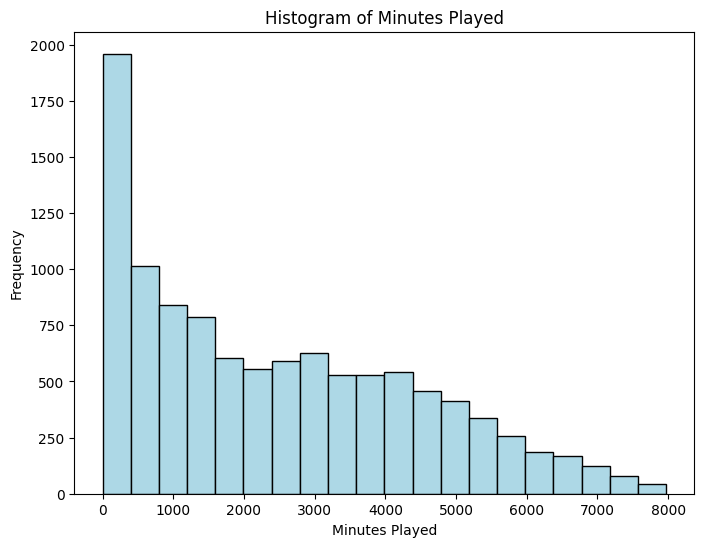

In [42]:
plt.figure(figsize=(8, 6))
plt.hist(data_players['minutes played'], bins=20, color='lightblue', edgecolor='black')
plt.title('Histogram of Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Frequency')
plt.show()

In [43]:
data_players.shape

(10645, 21)

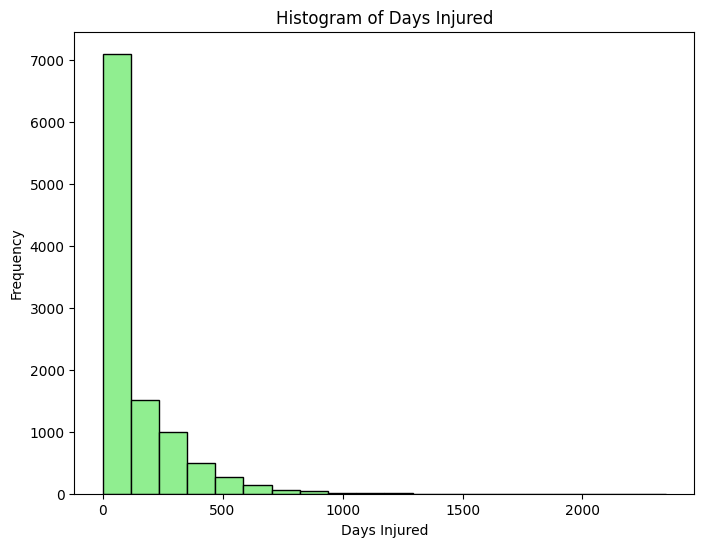

In [44]:
#'days_injured'
#remove 500+
plt.figure(figsize=(8, 6))
plt.hist(data_players['days_injured'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Days Injured')
plt.xlabel('Days Injured')
plt.ylabel('Frequency')
plt.show()

In [45]:
data_players = data_players[(data_players['days_injured']<=500) ]

In [46]:
data_players.shape

(10175, 21)

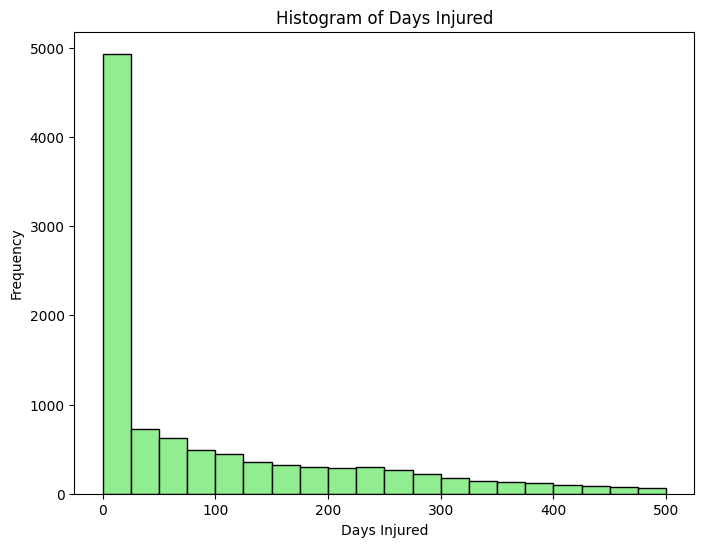

In [47]:
plt.figure(figsize=(8, 6))
plt.hist(data_players['days_injured'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Days Injured')
plt.xlabel('Days Injured')
plt.ylabel('Frequency')
plt.show()

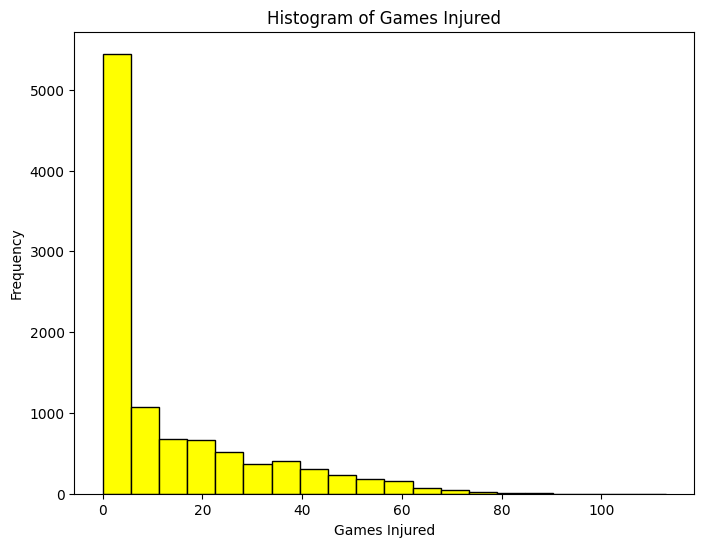

In [48]:
#'games_injured'
#remove 80++
plt.figure(figsize=(8, 6))
plt.hist(data_players['games_injured'], bins=20, color='yellow', edgecolor='black')
plt.title('Histogram of Games Injured')
plt.xlabel('Games Injured')
plt.ylabel('Frequency')
plt.show()


In [49]:
data_players = data_players[(data_players['days_injured']<=80) ]

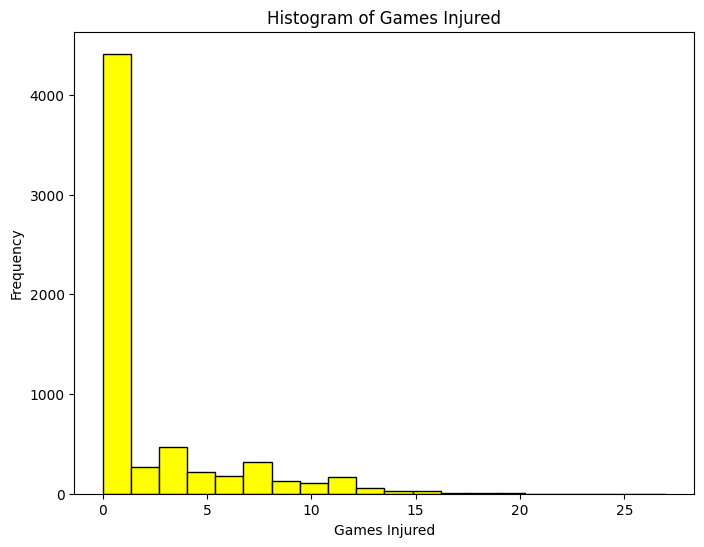

In [50]:
plt.figure(figsize=(8, 6))
plt.hist(data_players['games_injured'], bins=20, color='yellow', edgecolor='black')
plt.title('Histogram of Games Injured')
plt.xlabel('Games Injured')
plt.ylabel('Frequency')
plt.show()

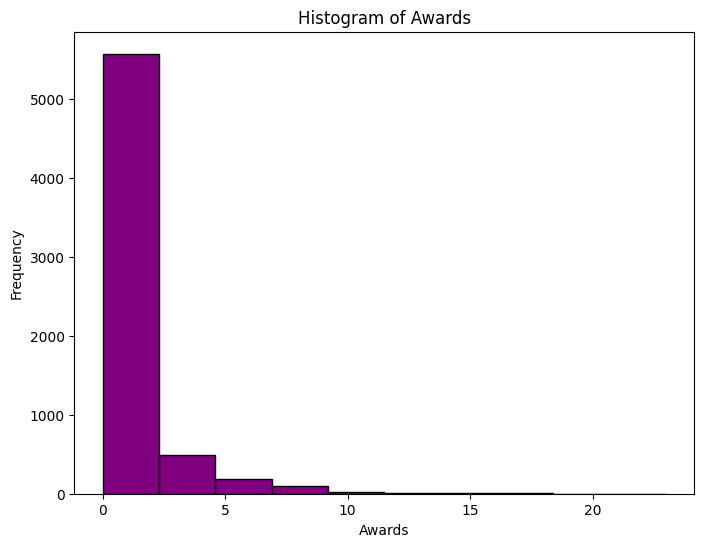

In [51]:
# 'award'
plt.figure(figsize=(8, 6))
plt.hist(data_players['award'], bins=10, color='purple', edgecolor='black')
plt.title('Histogram of Awards')
plt.xlabel('Awards')
plt.ylabel('Frequency')
plt.show()
#30++

In [52]:
data_players.shape

(6400, 21)

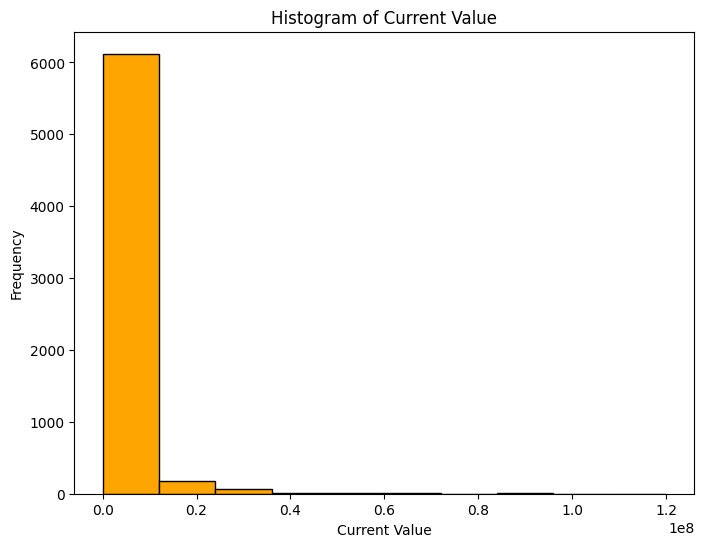

In [53]:
# 'current_value'
plt.figure(figsize=(8, 6))
plt.hist(data_players['current_value'], bins=10, color='orange', edgecolor='black')
plt.title('Histogram of Current Value')
plt.xlabel('Current Value')
plt.ylabel('Frequency')
plt.show()
#0,40

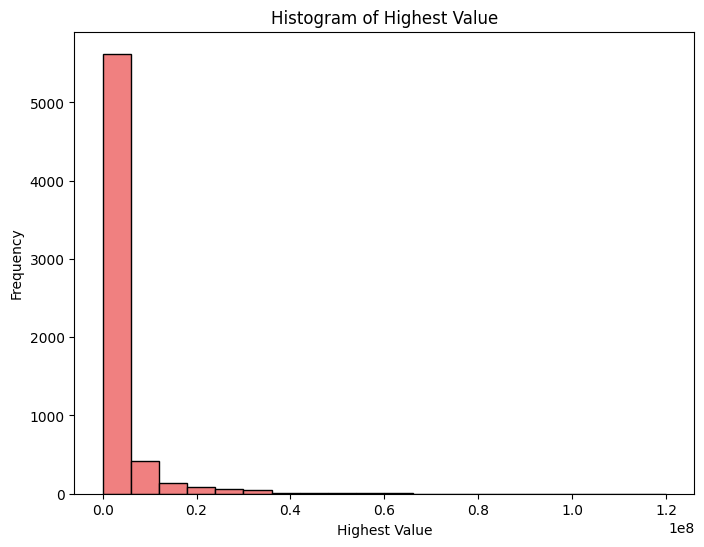

In [54]:
# 'highest_value'
plt.figure(figsize=(8, 6))
plt.hist(data_players['highest_value'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of Highest Value')
plt.xlabel('Highest Value')
plt.ylabel('Frequency')
plt.show()


In [55]:
data_players['current_value'].max()

np.int64(120000000)

## Feature engineering

In [56]:
categorical_features

['position', 'team']

In [57]:
data_players = pd.get_dummies(data_players, columns=categorical_features)

In [58]:
data_players.head()

,name,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,position_Attack,position_Attack Centre-Forward,position_Attack-LeftWinger,position_Attack-RightWinger,position_Attack-SecondStriker,position_Defender,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield,team_1.FC Köln,team_1.FC Union Berlin,team_1.FSV Mainz 05,team_AA Argentinos Juniors,team_AC Ajaccio,team_AC Milan,team_AC Monza,team_ACF Fiorentina,team_AFC Bournemouth,team_AJ Auxerre,team_AS Monaco,team_AS Roma,team_AZ Alkmaar,team_Abha Club,team_Adana Demirspor,team_Adelaide United,team_Ajax Amsterdam,team_Akhmat Grozny,team_Al-Adalah FC,team_Al-Batin FC,team_Al-Fateh SC,team_Al-Fayha FC,team_Al-Hilal Saudi FC,team_Al-Ittihad Club (Jeddah),team_Al-Khaleej,team_Al-Nassr FC,team_Al-Raed SFC,team_Al-Shabab Club (Riyadh),team_Al-Taawoun FC,team_Al-Tai,team_Al-Wehda FC,team_Alanyaspor,team_Albirex Niigata,team_AmaZulu FC,team_América Futebol Clube (MG),team_Angers SCO,team_Antalyaspor,team_Arsenal FC,team_Arsenal Fútbol Club,team_Aston Villa,team_Atalanta BC,team_Athletic Bilbao,team_Atlanta United FC,team_Atlas Guadalajara,team_Atlético de Madrid,team_Atlético de San Luis,team_Austin FC,team_Austria Vienna,team_Avispa Fukuoka,team_Basaksehir FK,team_Bayer 04 Leverkusen,team_Bayern Munich,team_Besiktas JK,team_Birmingham City,team_Blackburn Rovers,team_Blackpool FC,team_Boavista FC,team_Bologna FC 1909,team_Borussia Dortmund,team_Borussia Mönchengladbach,team_Botafogo de Futebol e Regatas,team_Brentford FC,team_Brighton &amp; Hove Albion,team_Brisbane Roar,team_Bristol City,team_Burnley FC,team_CA Banfield,team_CA Barracas Central,team_CA Boca Juniors,team_CA Central Córdoba (SdE),team_CA Colon,team_CA Huracán,team_CA Independiente,team_CA Newell's Old Boys,team_CA Osasuna,team_CA River Plate,team_CA Rosario Central,team_CA San Lorenzo de Almagro,team_CA Sarmiento (Junin),team_CA Vélez Sarsfield,team_CD Cruz Azul,team_CD Godoy Cruz Antonio Tomba,team_CD Santa Clara,team_CF América,team_CF Monterrey,team_CF Montréal,team_CF Pachuca,team_CR Flamengo,team_CS Marítimo,team_CSKA Moscow,team_Cape Town City FC,team_Cardiff City,team_Casa Pia AC,team_Celta de Vigo,team_Central Coast Mariners,team_Cerezo Osaka,team_Charlotte FC,team_Chelsea FC,team_Chicago Fire FC,team_Chippa United,team_Clermont Foot 63,team_Club Athletico Paranaense,team_Club Atlético Belgrano,team_Club Atlético Lanús,team_Club Atlético Platense,team_Club Atlético Talleres,team_Club Atlético Tigre,team_Club Atlético Tucumán,team_Club Atlético Unión,team_Club Estudiantes de La Plata,team_Club León FC,team_Club Necaxa,team_Club Tijuana,team_Club de Gimnasia y Esgrima La Plata,team_Clube Atlético Mineiro,team_Clube de Regatas Vasco da Gama,team_Colorado Rapids,team_Columbus Crew,team_Coritiba Foot Ball Club,team_Coventry City,team_Cruzeiro Esporte Clube,team_Crystal Palace,team_Cuiabá Esporte Clube (MT),team_Cádiz CF,team_D.C. United,team_Daegu FC,team_Daejeon Hana Citizen,team_Damac FC,team_Defensa y Justicia,team_Deportivo Guadalajara,team_Deportivo Toluca,team_Dynamo Moscow,team_ESTAC Troyes,team_Eintracht Frankfurt,team_Elche CF,team_Esporte Clube Bahia,team_Ettifaq FC,team_Everton FC,team_Excelsior Rotterdam,team_FC Arouca,team_FC Augsburg,team_FC Barcelona,team_FC Cincinnati,team_FC Dallas,team_FC Emmen,team_FC Empoli,team_FC Famalicão,team_FC Groningen,team_FC Juárez,team_FC Lorient,team_FC Nantes,team_FC Pari Nizhniy Novgorod,team_FC Paços de Ferreira,team_FC Porto,team_FC Schalke 04,team_FC Seoul,team_FC Sochi,team_FC Tokyo,team_FC Toulouse,team_FC Utrecht,team_FC Vizela,team_FC Volendam,team_FK Khimki,team_FK Krasnod

In [59]:
data_players.shape

(6400, 409)

## Feature selection

In [60]:
correlation= data_players.corr(numeric_only=True)
print(correlation['current_value'].sort_values(ascending=False))


current_value          1.000000
highest_value          0.931191
appearance             0.387807
minutes played         0.384967
team_Arsenal FC        0.221466
                         ...   
position_Attack       -0.032565
position_midfield     -0.038875
age                   -0.054246
goals conceded        -0.060078
position_Goalkeeper   -0.081698
Name: current_value, Length: 408, dtype: float64


In [61]:
threshold = 0.1 
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'assists', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'team_Arsenal FC', 'team_Aston Villa', 'team_Bayern Munich',
       'team_Brighton &amp; Hove Albion', 'team_Chelsea FC',
       'team_FC Barcelona', 'team_Newcastle United', 'team_Real Madrid',
       'team_SSC Napoli'],
      dtype='object')

In [62]:
selected_features=['appearance', 'assists', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'team_Arsenal FC', 'team_Aston Villa', 'team_Bayern Munich',
       'team_Brighton &amp; Hove Albion', 'team_Chelsea FC',
       'team_FC Barcelona', 'team_Newcastle United', 'team_Real Madrid',
       'team_SSC Napoli']

In [63]:
data_players = data_players[selected_features]
data_players.head()

,appearance,assists,minutes played,days_injured,games_injured,award,current_value,highest_value,team_Arsenal FC,team_Aston Villa,team_Bayern Munich,team_Brighton &amp; Hove Albion,team_Chelsea FC,team_FC Barcelona,team_Newcastle United,team_Real Madrid,team_SSC Napoli
8,34,0.000000,2758,47,13,0,2000000,2000000,False,False,False,False,False,False,False,False,False
16,55,0.313667,4017,0,0,10,25000000,100000000,False,False,False,False,False,False,False,False,False
18,92,0.221811,4869,45,10,11,20000000,50000000,False,False,False,False,False,False,False,False,False
20,39,0.064562,2788,0,0,1,800000,800000,False,False,False,False,False,False,False,False,False
21,51,0.102506,3512,0,0,1,800000,800000,False,False,False,False,False,False,False,False,False


In [64]:
data_players.shape

(6400, 17)

## prepare train and test data

In [65]:
X = data_players.drop(['current_value'], axis=1)
y = data_players['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
X.shape

(6400, 16)

## Buliding the model

In [67]:
# Buliding the model
model = LinearRegression()

In [68]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the model

In [69]:
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [70]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])   # Linear model cofficients

In [71]:
coeff_df

,Coefficient
appearance,-3.101034e+05
assists,1.285298e+04
minutes played,5.443623e+05
days_injured,1.363339e+05
games_injured,-2.219568e+05
award,-4.754310e+05
highest_value,5.314499e+06
team_Arsenal FC,4.933694e+04
team_Aston Villa,1.216758e+05
team_Bayern Munich,2.575411e+05


In [72]:
print(f" Linear regression intercept: {model.intercept_}") 

 Linear regression intercept: 2170323.2421875


## Evaluating the Model 

### Mean Absolute Error

In [73]:
y_base = [y_train.mean()] * len(y_test)

In [74]:
y_base

[np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float64(2170323.2421875),
 np.float6

In [75]:
#MAE
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base:2e}')


Mean Absolute  Error of base model: 2.953968e+06


In [76]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute Error for training: 7.986541e+05
Mean Absolute Error for testing: 8.604308e+05


### Mean Square Error

In [77]:
#MSE
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 5.431661e+13


In [78]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:2e}')
print(f'Mean Squared Error for testing: {mse_test:2e}')

Mean Squared Error for training: 4.474931e+12
Mean Squared Error for testing: 5.158399e+12


### Root Mean Squared Error

In [79]:
#RMSE
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):2e}')

Root Mean Squared  Error of base model: 7.369980e+06


In [80]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train):2e}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test):2e}')

Root Mean Squared Error for training: 2.115403e+06
Root Mean Squared Error for testing: 2.271211e+06


### R Square

In [81]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.8685738189224274
R Square for testing: 0.9046537670367455


### Predictions vs. Real Values

In [82]:
predictions = model.predict(X_test_scaled)

In [83]:
predictions

array([ 3547767.9108325 ,  1840088.12103479,   107818.35204251, ...,
         -89039.61585784, 58489407.12176826,   216354.73643794])

In [84]:
Real_Values = np.array(y_test)

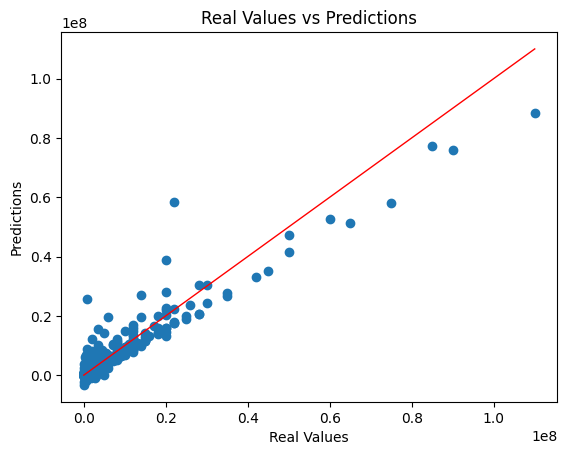

In [85]:
plt.scatter(Real_Values, predictions)
plt.plot([Real_Values.min(), Real_Values.max()], [Real_Values.min(), Real_Values.max()], color='red', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Real Values vs Predictions')
plt.show()

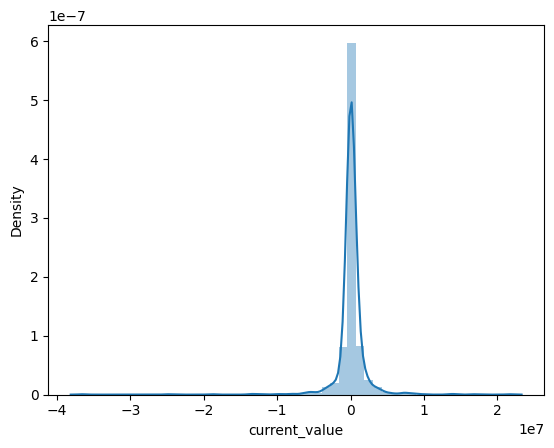

In [86]:
sns.distplot((y_test-predictions),bins=50); 

## Ridge and Lasso 

In [87]:
ridge_model = Ridge()

In [88]:
lasso_model = Lasso()

In [89]:
param_grid = {
    'alpha': [0, 0.003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search_ridge = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

##  Train the Model

In [90]:
# Fit GridSearchCV on the training data
grid_search_ridge.fit(X_train_scaled, y_train)
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best parameters and best model

# Ridge
best_params_ridge = grid_search_ridge.best_params_
best_model_ridge = grid_search_ridge.best_estimator_

# Lasso
best_params_lasso = grid_search_lasso.best_params_
best_model_lasso = grid_search_lasso.best_estimator_

print("Best Parameters for ridge model:", best_params_ridge)
print("Best Parameters for lasso model:", best_params_lasso)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for ridge model: {'alpha': 0.0002}
Best Parameters for lasso model: {'alpha': 5}


## Test the Model

In [91]:
#y_pred = model.predict(X_test_scaled)                  # Linear regression model
y_pred_ridge = best_model_ridge.predict(X_test_scaled) # Ridge model
y_pred_lasso = best_model_lasso.predict(X_test_scaled) # Lasso model

## Interpretation of the Model

In [92]:
#coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])                  # Linear model cofficients
coeff_df_ridge = pd.DataFrame(best_model_ridge.coef_,X.columns,columns=['Coefficient']) # Ridge model cofficients
coeff_df_lasso = pd.DataFrame(best_model_lasso.coef_,X.columns,columns=['Coefficient']) # Lasso model cofficients


In [93]:
coeff_df_ridge

,Coefficient
appearance,-3.101030e+05
assists,1.285297e+04
minutes played,5.443620e+05
days_injured,1.363338e+05
games_injured,-2.219567e+05
award,-4.754309e+05
highest_value,5.314499e+06
team_Arsenal FC,4.933697e+04
team_Aston Villa,1.216758e+05
team_Bayern Munich,2.575411e+05


In [94]:
coeff_df_lasso

,Coefficient
appearance,-3.099878e+05
assists,1.284084e+04
minutes played,5.442508e+05
days_injured,1.362729e+05
games_injured,-2.218969e+05
award,-4.754250e+05
highest_value,5.314495e+06
team_Arsenal FC,4.933163e+04
team_Aston Villa,1.216722e+05
team_Bayern Munich,2.575370e+05


In [95]:
print(f" Ridge model intercept: {best_model_ridge.intercept_}") 

 Ridge model intercept: 2170323.2421875


In [96]:
print(f" Lasso model intercept: {best_model_lasso.intercept_}") 

 Lasso model intercept: 2170323.2421875


## Evaluating the Model

In [97]:
# MSE for Ridge model
mse_train_ridge = mean_squared_error(y_train, best_model_ridge.predict(X_train_scaled))
mse_test_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error for training ridge model: {mse_train_ridge:2e}')
print(f'Mean Squared Error for testing ridge model: {mse_test_ridge:2e}')

Mean Squared Error for training ridge model: 4.474931e+12
Mean Squared Error for testing ridge model: 5.158399e+12


In [98]:
# MSE Lasso model
mse_train_lasso = mean_squared_error(y_train, best_model_lasso.predict(X_train_scaled))
mse_test_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error for training lasso model: {mse_train_lasso:2e}')
print(f'Mean Squared Error for testing lasso model: {mse_test_lasso:2e}')

Mean Squared Error for training lasso model: 4.474931e+12
Mean Squared Error for testing lasso model: 5.158408e+12


In [99]:
# MSE for Ridge model
mae_train_ridge = mean_absolute_error(y_train, best_model_ridge.predict(X_train_scaled))
mae_test_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Mean Absolute Error for training ridge model: {mae_train_ridge:2e}')
print(f'Mean Absolute Error for testing ridge model: {mae_test_ridge:2e}')

Mean Absolute Error for training ridge model: 7.986541e+05
Mean Absolute Error for testing ridge model: 8.604308e+05


In [100]:
# Lasso model
mae_train_lasso = mean_absolute_error(y_train, best_model_lasso.predict(X_train_scaled))
mae_test_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error for training lasso model: {mae_train_lasso:2e}')
print(f'Mean Absolute Error for testing lasso model: {mae_test_lasso:2e}')

Mean Absolute Error for training lasso model: 7.986476e+05
Mean Absolute Error for testing lasso model: 8.604241e+05


In [101]:
# RMSE for Ridge model

print(f'Root Mean Squared Error for training ridge model: {np.sqrt(mse_train_ridge):2e}')
print(f'Root Mean Squared Error for testing ridge model: {np.sqrt(mse_test_ridge):2e}')

Root Mean Squared Error for training ridge model: 2.115403e+06
Root Mean Squared Error for testing ridge model: 2.271211e+06


In [102]:
# RMSE Lasso model

print(f'Root Mean Squared Error for training lasso model: {np.sqrt(mse_train_lasso):2e}')
print(f'Root Mean Squared Error for testing lasso model: {np.sqrt(mse_test_lasso):2e}')

Root Mean Squared Error for training lasso model: 2.115403e+06
Root Mean Squared Error for testing lasso model: 2.271213e+06


In [103]:
# Ridge model r2 score
r2_score_train_ridge = r2_score(y_train, best_model_ridge.predict(X_train_scaled))
r2_score_test_ridge = r2_score(y_test, y_pred_ridge)
print(f'R Square for training ridge model: {r2_score_train_ridge}')
print(f'R Square for testing ridge model: {r2_score_test_ridge}')

R Square for training ridge model: 0.868573818922425
R Square for testing ridge model: 0.9046537638640267


In [104]:
# Lasso model r2 score
r2_score_train_lasso = r2_score(y_train, best_model_lasso.predict(X_train_scaled))
r2_score_test_lasso = r2_score(y_test, y_pred_lasso)
print(f'R Square for training lasso model: {r2_score_train_lasso}')
print(f'R Square for testing lasso model: {r2_score_test_lasso}')

R Square for training lasso model: 0.8685738188615788
R Square for testing lasso model: 0.9046535988616451


## Predictions vs. Real Values

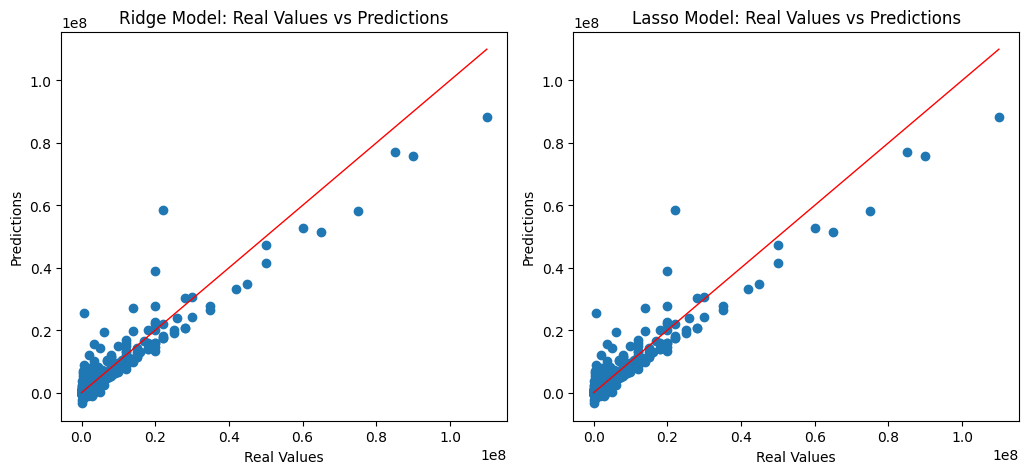

In [105]:
plt.figure(figsize=(15, 5))
# Ridge Model
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Ridge Model: Real Values vs Predictions')

# Lasso Model
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Lasso Model: Real Values vs Predictions')

plt.tight_layout()
plt.show()

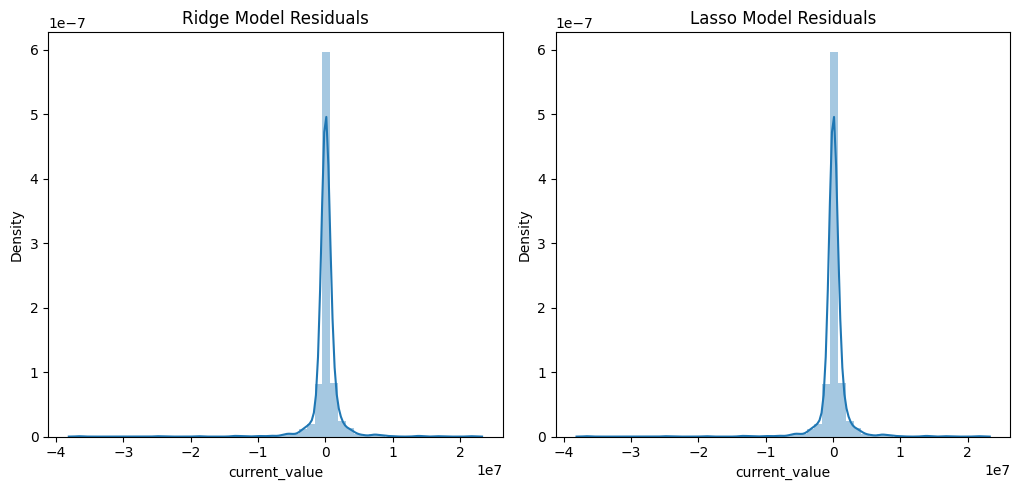

In [106]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
sns.distplot((y_test - y_pred_ridge), bins=50)
plt.title('Ridge Model Residuals')

plt.subplot(1, 3, 3)
sns.distplot((y_test - y_pred_lasso), bins=50)
plt.title('Lasso Model Residuals')

plt.tight_layout()
plt.show()

## logisitic regression

In [107]:
data_players.shape

(6400, 17)

In [108]:
data_players.head(2)

,appearance,assists,minutes played,days_injured,games_injured,award,current_value,highest_value,team_Arsenal FC,team_Aston Villa,team_Bayern Munich,team_Brighton &amp; Hove Albion,team_Chelsea FC,team_FC Barcelona,team_Newcastle United,team_Real Madrid,team_SSC Napoli
8,34,0.000000,2758,47,13,0,2000000,2000000,False,False,False,False,False,False,False,False,False
16,55,0.313667,4017,0,0,10,25000000,100000000,False,False,False,False,False,False,False,False,False


#### Feature engineering

In [109]:
# Calculate the 35th and 75th percentiles of the price
p35 = data_players['current_value'].quantile(0.35)
p75 = data_players['current_value'].quantile(0.75)

# Function to categorize prices
def categorize_price(price):
    if price < p35:
        return 'low_Price'
    elif price < p75:
        return 'Good_Price'
    else:
        return 'High_Price'

# Apply the function to create a new column
data_players['current_value_category'] = data_players['current_value'].apply(categorize_price)

data_players.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(data_players['current_value_category'].value_counts())

current_value_category
Good_Price    2718
low_Price     2066
High_Price    1616
Name: count, dtype: int64


In [110]:
p35, p75

(np.float64(300000.0), np.float64(1800000.0))

In [111]:
data_players['current_value_category']

8        High_Price
16       High_Price
18       High_Price
20       Good_Price
21       Good_Price
            ...    
10748     low_Price
10749     low_Price
10751     low_Price
10752     low_Price
10753     low_Price
Name: current_value_category, Length: 6400, dtype: object

In [112]:
encoder = LabelEncoder()
data_players['current_value_category_encoded'] = encoder.fit_transform(data_players['current_value_category'])  

#### Feature selection

In [113]:
correlation2 = data_players.corr(numeric_only=True)
print(correlation2['current_value_category_encoded'].sort_values(ascending=False))

current_value_category_encoded     1.000000
team_Brighton &amp; Hove Albion    0.009302
team_SSC Napoli                    0.009302
team_Chelsea FC                    0.004198
team_Arsenal FC                    0.003926
team_Real Madrid                   0.002967
team_FC Barcelona                  0.002967
team_Aston Villa                  -0.001580
team_Newcastle United             -0.002312
team_Bayern Munich                -0.005838
highest_value                     -0.024867
assists                           -0.065817
award                             -0.124739
games_injured                     -0.163143
days_injured                      -0.175111
minutes played                    -0.238253
appearance                        -0.258098
Name: current_value_category_encoded, dtype: float64


In [114]:
# Set the correlation threshold
threshold = 0.01 # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features2 = correlation2[abs(correlation2['current_value_category_encoded']) > \
threshold]['current_value_category_encoded'].index
selected_features2

Index(['appearance', 'assists', 'minutes played', 'days_injured',
       'games_injured', 'award', 'highest_value',
       'current_value_category_encoded'],
      dtype='object')

In [115]:
selected_features2= ['appearance', 'assists', 'minutes played', 'days_injured',
       'games_injured', 'award', 'highest_value',
       'current_value_category_encoded']

In [116]:
data_players2 = data_players[selected_features2]
data_players2.head()

,appearance,assists,minutes played,days_injured,games_injured,award,highest_value,current_value_category_encoded
8,34,0.000000,2758,47,13,0,2000000,1
16,55,0.313667,4017,0,0,10,100000000,1
18,92,0.221811,4869,45,10,11,50000000,1
20,39,0.064562,2788,0,0,1,800000,0
21,51,0.102506,3512,0,0,1,800000,0


### Prepare train and test data

In [117]:
# Prepare data
X =data_players2.drop(['current_value_category_encoded'], axis=1)
y = data_players2['current_value_category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [118]:
X.shape

(6400, 7)

## Buliding the Model

In [119]:
Logistic_model = LogisticRegression()

## Train the Model

In [120]:
# Fit the model on the training data
Logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

## Test the Model

In [121]:
# Predict and evaluate the model
y_pred_test = Logistic_model.predict(X_test_scaled)

## Interpretation of the Model

In [122]:
# Each row of the model.coef_ matrix tells you how each feature affects being in the corresponding class versus any other class
coeff_data_players = pd.DataFrame(Logistic_model.coef_[2],X.columns,columns=['Coefficient'])
coeff_data_players

,Coefficient
appearance,-0.486866
assists,-0.058189
minutes played,-0.150033
days_injured,-0.223814
games_injured,0.073690
award,0.123813
highest_value,-11.624657


In [123]:
Logistic_model.coef_

array([[  0.19646722,  -0.01405125,  -0.04828737,   0.07813411,
          0.03130729,   0.08402746,   2.90301863],
       [  0.29039901,   0.07224021,   0.19832046,   0.14568036,
         -0.10499757,  -0.20784065,   8.72163788],
       [ -0.48686622,  -0.05818897,  -0.15003309,  -0.22381447,
          0.07369028,   0.12381319, -11.62465651]])

In [124]:
print(Logistic_model.intercept_) 

[ 1.95001115  1.50186811 -3.45187926]


## Evaluating the Model 

In [125]:
base_model = round(data_players['current_value_category_encoded'].value_counts()[1]/data_players.shape[0]*100, 2)
base_model

np.float64(25.25)

1. Accuracy

In [126]:
# Train score
y_pred_train = Logistic_model.predict(X_train_scaled)
accuracy_Train = accuracy_score(y_train, y_pred_train)
accuracy_Train

0.7791015625

In [127]:
# Test score
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_test

0.7890625

Confusion

In [128]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
conf_matrix

array([[408,  27,  91],
       [ 95, 257,   0],
       [ 57,   0, 345]])

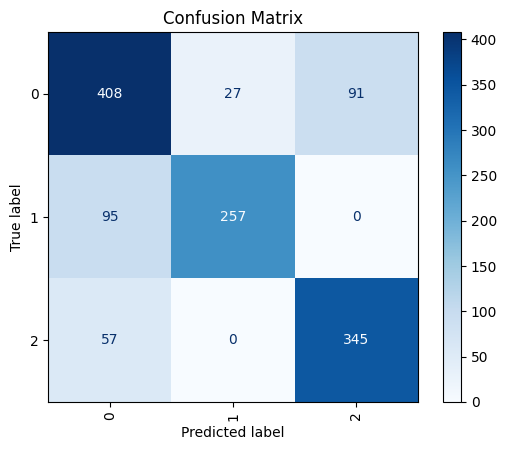

In [129]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test,
                                        display_labels=Logistic_model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

2. Precision

In [130]:
# Train score
precision_train = precision_score(y_train, y_pred_train, average='macro')
print(f"Precision in train: {precision_train:.2f}")

# Test score
precision_test = precision_score(y_test, y_pred_test, average='macro')
print(f"Precision in test: {precision_test:.2f}")

Precision in train: 0.80
Precision in test: 0.81


3. Recall

In [131]:
# Train score
recall_train = recall_score(y_train, y_pred_train, average='macro')
print(f"Recall in train: {recall_train:.2f}")

# Test score
recall_test = recall_score(y_test, y_pred_test, average='macro')
print(f"Recall in test: {recall_test:.2f}")

Recall in train: 0.78
Recall in test: 0.79


4. F1-Score

In [132]:
# Train score
f1_train = f1_score(y_train, y_pred_train, average='macro')
print(f"f1-score in train: {f1_train:.2f}")

# Test score
f1_test = precision_score(y_test, y_pred_test, average='macro')
print(f"f1-score in test: {f1_test:.2f}")

f1-score in train: 0.78
f1-score in test: 0.81


In [133]:
print('Train report: ')
print(classification_report(y_train, y_pred_train))

print('Test report: ')
print(classification_report(y_test, y_pred_test))

Train report: 
              precision    recall  f1-score   support

           0       0.73      0.76      0.75      2192
           1       0.88      0.71      0.79      1264
           2       0.78      0.85      0.81      1664

    accuracy                           0.78      5120
   macro avg       0.80      0.78      0.78      5120
weighted avg       0.78      0.78      0.78      5120

Test report: 
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       526
           1       0.90      0.73      0.81       352
           2       0.79      0.86      0.82       402

    accuracy                           0.79      1280
   macro avg       0.81      0.79      0.79      1280
weighted avg       0.80      0.79      0.79      1280



## DecisionTree and RandomForest

## Buliding the Model

In [134]:
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()

In [135]:
param_grid = {
    'max_depth': [4, 5, 6, 7, 8],   # adjust tree depth
    'n_estimators':[35, 40, 50, 60]      # adjust num trees to build before taking the maximum voting or averages of predictions
}
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

## Train the Model

In [136]:
# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [137]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [138]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [35, 40, 50, 60]},
             scoring='f1_macro', verbose=1)

In [139]:
grid_search.best_params_

{'max_depth': 8, 'n_estimators': 60}

In [140]:
best_model = grid_search.best_estimator_

## Test the Model

In [141]:
# Predict and evaluate the model
y_pred_dt = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf_g = best_model.predict(X_test)

## Evaluating the Model 

In [142]:
# our benchmark model
base_model = round(data_players['current_value_category_encoded'].value_counts()[1]/data_players.shape[0]*100, 2)
base_model

np.float64(25.25)

1. Accuracy

In [143]:
# Evaluate train set dt model
y_pred_train_dt = dt_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_dt)
accuracy

0.9994140625

In [144]:
# Evaluate test set dt model
accuracy = accuracy_score(y_test, y_pred_dt)
accuracy

0.84375

In [145]:
# Evaluate train set rf model
y_pred_train_rf = rf_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf)
accuracy

0.9994140625

In [146]:
# Evaluate test set rf model
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.8734375

In [147]:
y_pred_train_rf_g = best_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf_g)
accuracy

0.898828125

In [148]:
accuracy = accuracy_score(y_test, y_pred_rf_g)
accuracy

0.88359375

In [149]:
conf_matrix = confusion_matrix(y_test, y_pred_rf_g)
conf_matrix

array([[462,  62,   2],
       [ 23, 329,   0],
       [ 59,   3, 340]])

In [150]:
print("Train classification report for best rf:")
print(f' {classification_report(y_train, y_pred_train_rf_g, labels=list(best_model.classes_))}')
print(" Test classification report for best rf: ")
print(f'{classification_report(y_test, y_pred_rf_g, labels=list(best_model.classes_))}')

Train classification report for best rf:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      2192
           1       0.85      0.98      0.91      1264
           2       1.00      0.83      0.90      1664

    accuracy                           0.90      5120
   macro avg       0.91      0.90      0.90      5120
weighted avg       0.91      0.90      0.90      5120

 Test classification report for best rf: 
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       526
           1       0.84      0.93      0.88       352
           2       0.99      0.85      0.91       402

    accuracy                           0.88      1280
   macro avg       0.89      0.89      0.89      1280
weighted avg       0.89      0.88      0.88      1280



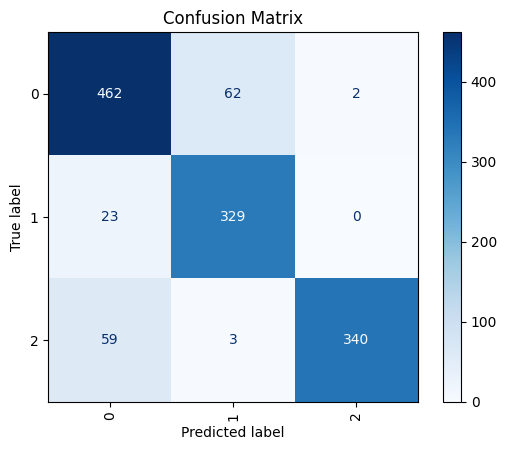

In [151]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_g,
                                        display_labels=best_model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [152]:
# Calculate Precision
precision = precision_score(y_test, y_pred_rf_g, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.89


In [153]:
# Calculate Recall
recall = recall_score(y_test, y_pred_rf_g, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.89


In [154]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred_rf_g, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.89


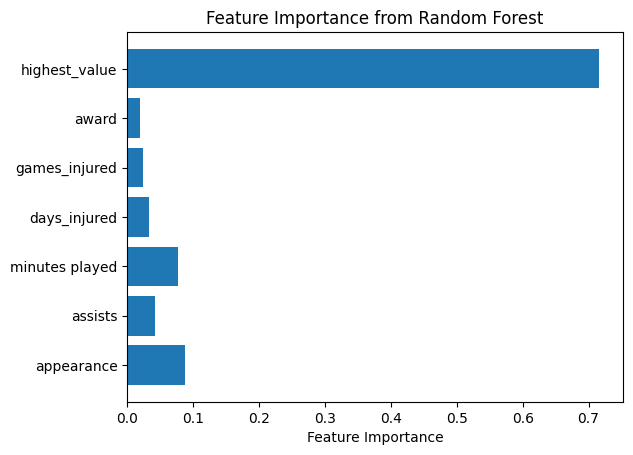

In [155]:
# Feature importance from Random Forest
feature_importances = best_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

## SVM

## Buliding the Model

In [ ]:

svm_classifier = SVC() 

In [448]:
param_grid = {
    'kernel': [
              #'linear',
               'rbf',
              #'poly'
              ],   # Regularization strength
    'C':[0,1],
    'gamma': [1,2,6]
}
grid_search = GridSearchCV(estimator=svm_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

In [449]:
# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0, 1], 'gamma': [1, 2, 6], 'kernel': ['rbf']},
             scoring='f1_macro', verbose=1)

In [450]:

grid_search.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [451]:
model = grid_search.best_estimator_

## Test the Model

In [452]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Evaluating the Model 

In [453]:
# our benchmark model
base_model = round(data_players['current_value_category_encoded'].value_counts()[1]/data_players.shape[0]*100, 2)
base_model

np.float64(25.25)

1. Accuracy

In [456]:
# i tried multiple number of c and the more the c increase the overfit increse and the best number i tried  was 'C': 1 , but still there is an overfit
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.8271484375

In [457]:
 #Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.76796875

In [260]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[401,  46,  79],
       [ 69, 283,   0],
       [ 98,   5, 299]])

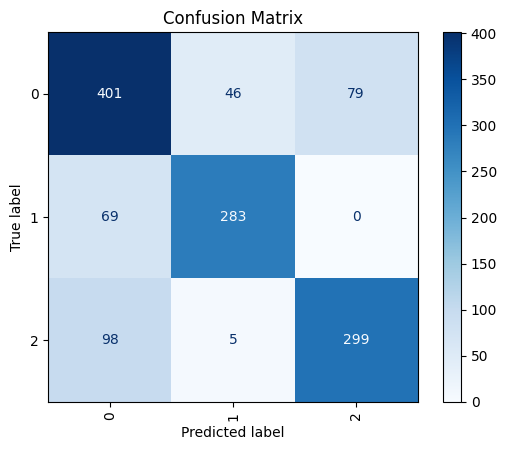

In [261]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [262]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.78


In [263]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.77


In [264]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.77


In [265]:
print(classification_report(y_test,
                      y_pred,
                      labels=list(model.classes_)))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       526
           1       0.85      0.80      0.83       352
           2       0.79      0.74      0.77       402

    accuracy                           0.77      1280
   macro avg       0.78      0.77      0.77      1280
weighted avg       0.77      0.77      0.77      1280



## KNN

## Buliding the Model

In [268]:
model = KNeighborsClassifier()

In [431]:
param_grid = {
    'n_neighbors': [1,2, 4, 10]
}
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

## Train the Model

In [432]:
# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'n_neighbors': [1, 2, 4, 10]}, scoring='f1_macro',
             verbose=1)

In [433]:
grid_search.best_params_

{'n_neighbors': 10}

In [434]:
model = grid_search.best_estimator_

 ## Test the Model

In [435]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Evaluating the Model

In [436]:
# our benchmark model
base_model = round(data_players['current_value_category_encoded'].value_counts()[1]/data_players.shape[0]*100, 2)
base_model

np.float64(25.25)

Accuracy

In [437]:
# Train score
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.77578125

In [438]:
# Test score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7328125

In [439]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[431,  30,  65],
       [113, 236,   3],
       [129,   2, 271]])

In [440]:
print("Train classification report for best knn:")
print(f' {classification_report(y_train, y_pred_train, labels=list(model.classes_))}')
print("Test classification report for best knn: ")
print(f'{classification_report(y_test, y_pred, labels=list(model.classes_))}')

Train classification report for best knn:
               precision    recall  f1-score   support

           0       0.69      0.87      0.77      2192
           1       0.89      0.67      0.76      1264
           2       0.86      0.73      0.79      1664

    accuracy                           0.78      5120
   macro avg       0.81      0.76      0.78      5120
weighted avg       0.80      0.78      0.78      5120

Test classification report for best knn: 
              precision    recall  f1-score   support

           0       0.64      0.82      0.72       526
           1       0.88      0.67      0.76       352
           2       0.80      0.67      0.73       402

    accuracy                           0.73      1280
   macro avg       0.77      0.72      0.74      1280
weighted avg       0.76      0.73      0.73      1280



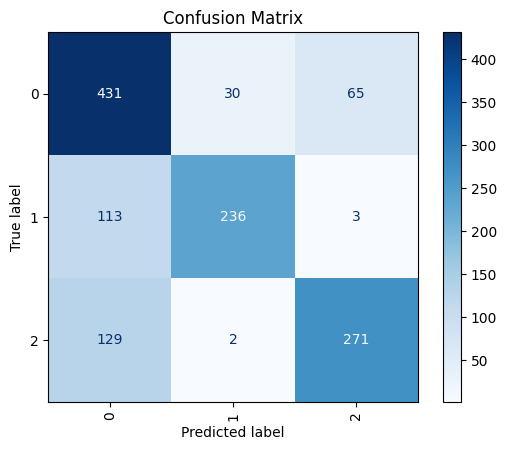

In [441]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [442]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.77


In [443]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.72


In [444]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.74
